In [1]:
# Імпортуєм бібліотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from scipy.signal import argrelmax, argrelextrema
from sympy import Point, Line, Segment

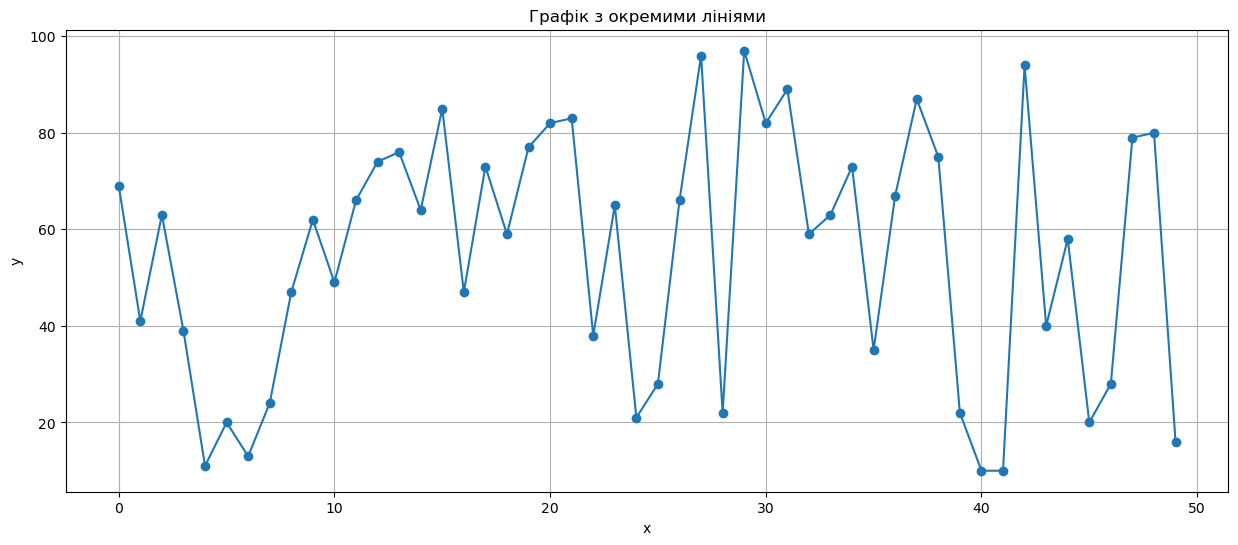

In [36]:
# Створюємо набір точок
y = np.random.randint(10, 101, 50, dtype=int)
x = [x for x in range(0, 50)]
plt.figure(figsize=(15, 6))
plt.plot(y, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Графік з окремими лініями')
plt.show()

In [37]:
if y[0] > y[1]:
    res_y = [y[0] - 1]
else:
    res_y = [y[0]]
res_y.extend(y)
if y[-1] > y[-2]:
    res_y.append(y[-1] - 1)
else:
    res_y.append(y[-1])
res_x = list(range(len(res_y)))
y = res_y
x = res_x

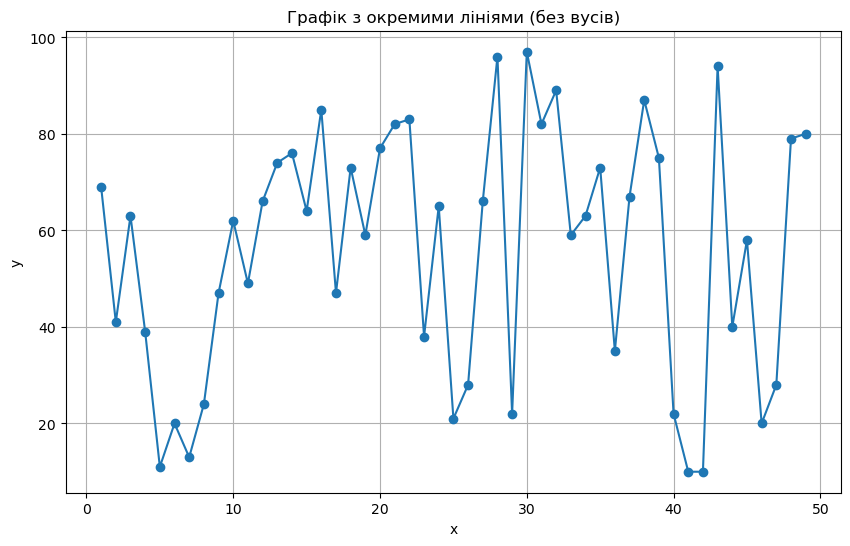

In [38]:
#
curve_coordinates = np.column_stack((x, y))
y_values = curve_coordinates[:, 1]
maxima_indices = argrelmax(y_values)
relative_maxima = curve_coordinates[maxima_indices]
x1 = x[relative_maxima[0][0]:relative_maxima[-1][0]+1]
y1 = y[relative_maxima[0][0]:relative_maxima[-1][0]+1]
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Графік з окремими лініями (без вусів)')
plt.show()

In [39]:
# Максимальна точка по y
curve_coordinats = [x for x in zip(x1, y1)]
curve_coordinats_sorted = sorted(curve_coordinats, key=lambda x: x[1], reverse=True)
ind_max_first = curve_coordinats_sorted[0][0]
ind_max_first

30

In [40]:
# Розбиваємо на дві криві по максимуму y, якщо максимум на краях то один з списків пустий
if ind_max_first == 0:
    curve_coordinats_left = []
    curve_coordinats_right = curve_coordinats
elif ind_max_first == len(curve_coordinats):
    curve_coordinats_left = curve_coordinats
    curve_coordinats_right = []
else:
    curve_coordinats_left = curve_coordinats[:ind_max_first]
    curve_coordinats_right = curve_coordinats[ind_max_first-1:]

In [41]:
curve_coordinats_right

[(30, 97),
 (31, 82),
 (32, 89),
 (33, 59),
 (34, 63),
 (35, 73),
 (36, 35),
 (37, 67),
 (38, 87),
 (39, 75),
 (40, 22),
 (41, 10),
 (42, 10),
 (43, 94),
 (44, 40),
 (45, 58),
 (46, 20),
 (47, 28),
 (48, 79),
 (49, 80)]

In [42]:
# Сортуємо по y праву криву
curve_coordinats_right_sorted = sorted(curve_coordinats_right, key=lambda x: x[1], reverse=True)
curve_coordinats_right_sorted

[(30, 97),
 (43, 94),
 (32, 89),
 (38, 87),
 (31, 82),
 (49, 80),
 (48, 79),
 (39, 75),
 (35, 73),
 (37, 67),
 (34, 63),
 (33, 59),
 (45, 58),
 (44, 40),
 (36, 35),
 (47, 28),
 (40, 22),
 (46, 20),
 (41, 10),
 (42, 10)]

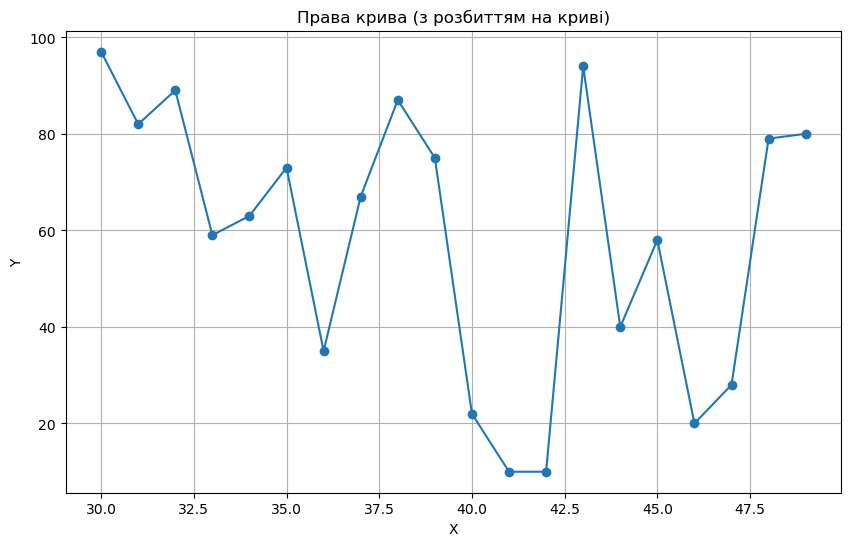

In [43]:
plt.figure(figsize=(10, 6))
x = [item[0] for item in curve_coordinats_right]
y = [item[1] for item in curve_coordinats_right]
plt.plot(x, y, marker='o')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Права крива (з розбиттям на криві)")
plt.grid(True)
plt.show()

In [44]:
# Розбиваємо праву криву на окремі криві
c_right = []
curve_coordinats_right_sorted1 = curve_coordinats_right_sorted.copy()
while len(curve_coordinats_right_sorted1) >= 3:
    start = curve_coordinats_right_sorted1[0][0]
    end = curve_coordinats_right_sorted1[1][0]
    if abs(start - end) == 1:
        end = curve_coordinats_right_sorted1[2][0]
    list_x = list(range(start, end + 1))
    res = []
    for i in curve_coordinats_right_sorted1:
        if i[0] in list_x:
            res.append(i)
    res = sorted(res, key=lambda x: x[0])
    curve_coordinats_right_sorted1 = [x for x in curve_coordinats_right_sorted1 if x not in res[:-1]]
    c_right.append(res)
c_right

[[(30, 97),
  (31, 82),
  (32, 89),
  (33, 59),
  (34, 63),
  (35, 73),
  (36, 35),
  (37, 67),
  (38, 87),
  (39, 75),
  (40, 22),
  (41, 10),
  (42, 10),
  (43, 94)],
 [(43, 94), (44, 40), (45, 58), (46, 20), (47, 28), (48, 79), (49, 80)]]

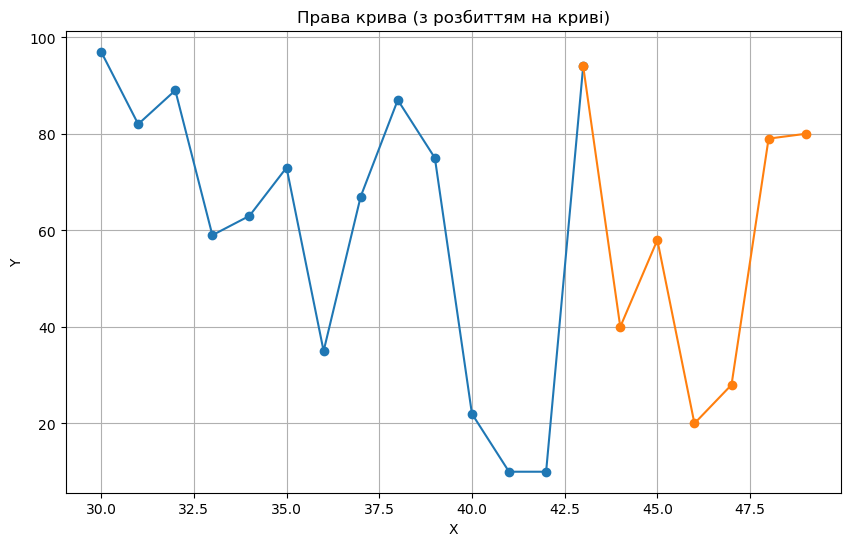

In [45]:
plt.figure(figsize=(10, 6))
for sublist in c_right:
    x = [item[0] for item in sublist]
    y = [item[1] for item in sublist]
    
    plt.plot(x, y, marker='o')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Права крива (з розбиттям на криві)")
plt.grid(True)
plt.show()

In [46]:
curve_coordinats_left_sorted = sorted(curve_coordinats_left, key=lambda x: x[1], reverse=True)
curve_coordinats_left_sorted

[(30, 97),
 (28, 96),
 (16, 85),
 (22, 83),
 (21, 82),
 (20, 77),
 (14, 76),
 (13, 74),
 (18, 73),
 (1, 69),
 (12, 66),
 (27, 66),
 (24, 65),
 (15, 64),
 (3, 63),
 (10, 62),
 (19, 59),
 (11, 49),
 (9, 47),
 (17, 47),
 (2, 41),
 (4, 39),
 (23, 38),
 (26, 28),
 (8, 24),
 (29, 22),
 (25, 21),
 (6, 20),
 (7, 13),
 (5, 11)]

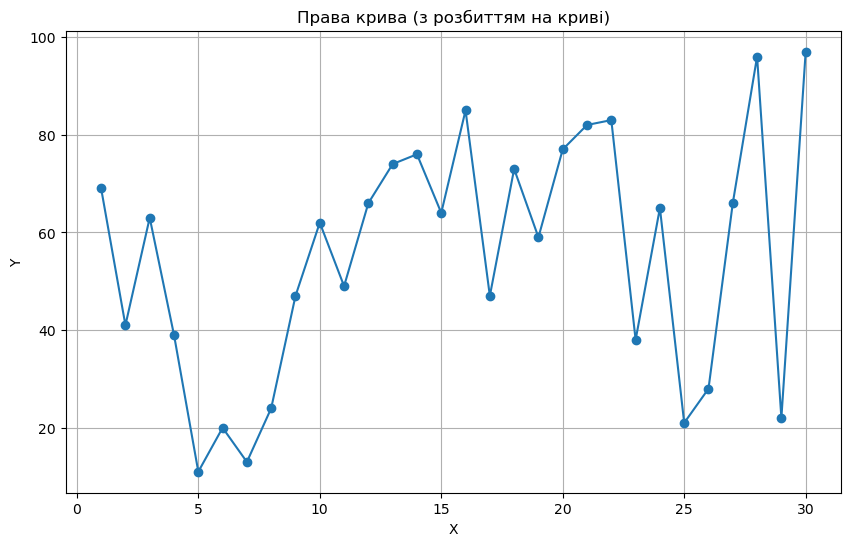

In [47]:
plt.figure(figsize=(10, 6))
x = [item[0] for item in curve_coordinats_left]
y = [item[1] for item in curve_coordinats_left]
plt.plot(x, y, marker='o')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Права крива (з розбиттям на криві)")
plt.grid(True)
plt.show()

In [48]:
c_left = []
curve_coordinats_left_sorted1 = curve_coordinats_left_sorted.copy()
while len(curve_coordinats_left_sorted1) >= 3:
    start = curve_coordinats_left_sorted1[0][0]
    end = curve_coordinats_left_sorted1[1][0]
    if abs(start - end) == 1:
        end = curve_coordinats_left_sorted1[2][0]
    list_x = list(range(end, start + 1))
    res = []
    for i in curve_coordinats_left_sorted1:
        if i[0] in list_x:
            res.append(i)
    res = sorted(res, key=lambda x: x[0])
    curve_coordinats_left_sorted1 = [x for x in curve_coordinats_left_sorted1 if x not in res[1:]]
    c_left.append(res)
c_left

[[(28, 96), (29, 22), (30, 97)],
 [(16, 85),
  (17, 47),
  (18, 73),
  (19, 59),
  (20, 77),
  (21, 82),
  (22, 83),
  (23, 38),
  (24, 65),
  (25, 21),
  (26, 28),
  (27, 66),
  (28, 96)],
 [(14, 76), (15, 64), (16, 85)],
 [(1, 69),
  (2, 41),
  (3, 63),
  (4, 39),
  (5, 11),
  (6, 20),
  (7, 13),
  (8, 24),
  (9, 47),
  (10, 62),
  (11, 49),
  (12, 66),
  (13, 74),
  (14, 76)]]

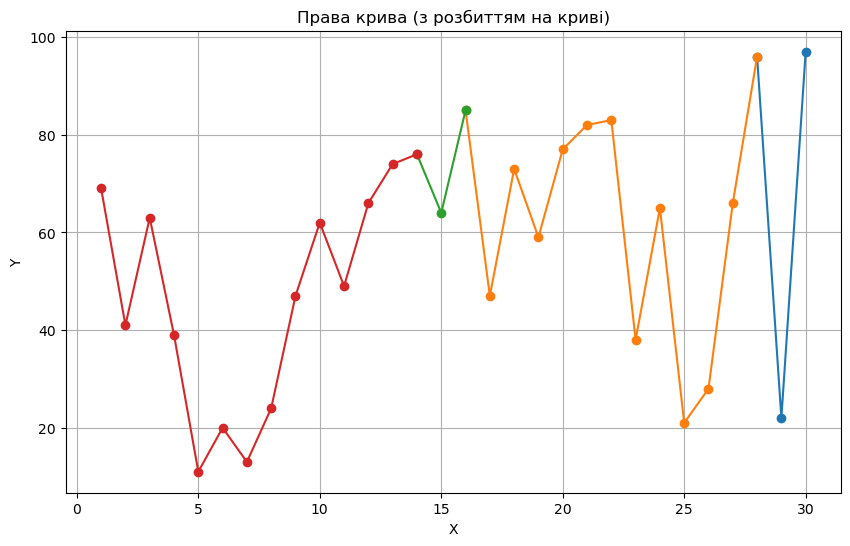

In [49]:
plt.figure(figsize=(10, 6))
for sublist in c_left:
    x = [item[0] for item in sublist]
    y = [item[1] for item in sublist]
    
    plt.plot(x, y, marker='o')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Права крива (з розбиттям на криві)")
plt.grid(True)
plt.show()

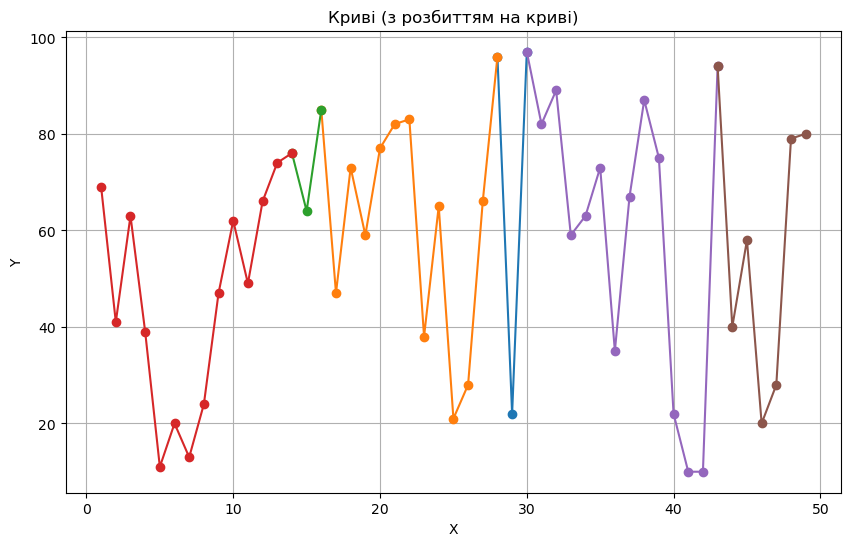

In [50]:
general_curve = c_left + c_right
plt.figure(figsize=(10, 6))
for sublist in general_curve:
    x = [item[0] for item in sublist]
    y = [item[1] for item in sublist]
    
    plt.plot(x, y, marker='o')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Криві (з розбиттям на криві)")
plt.grid(True)
plt.show()

In [51]:
def coordinat_transform(curve):
    # Функція знаходить верхню і нижню точку з іньшого ребра
    left = curve[0][1]
    right = curve[-1][1]
    if left == right:
        return curve
    elif left < right:
        while left < right and left < curve[-2][1]:
            curve = curve[:-1]
        return curve
    else:
        while right < left and right < curve[1][1]:
            curve = curve[1:]
        return curve
        
    return left, right

In [52]:
# Створюємо списки в яких удаляємо лишьні верхні точки ребра
coordinat_transform2 = []
for i in general_curve:
    coordinat_transform2.append(coordinat_transform(i))

In [53]:
def second_coordinat(coord):
    # Функція шукає горизонтальний перетин ліній
    a = coord[0][1]
    b = coord[-1][-1]
    if a == b:
        return (coord)
    elif a < b:
        p1_lin1 = Point(coord[0][0], coord[0][1])
        p2_lin1 = Point(coord[-1][0], coord[0][1])
        p1_lin2 = Point(coord[-2][0], coord[-2][1])
        p2_lin2 = Point(coord[-1][0], coord[-1][1])
        
        line1 = Line(p1_lin1, p2_lin1)
        line2 = Segment(p2_lin2, p1_lin2)
        
        intersection = line1.intersection(line2)
        x = intersection[0][0]
        y = intersection[0][1]
        return (coord[:-1] + [(x, y)])
    else:
        p1_lin1 = Point(coord[0][0], coord[0][1])
        p2_lin1 = Point(coord[1][0], coord[1][1])
        p1_lin2 = Point(coord[0][0], coord[-1][1])
        p2_lin2 = Point(coord[-1][0], coord[-1][1])
        line1 = Line(p1_lin1, p2_lin1)
        line2 = Segment(p1_lin2, p2_lin2)
        
        intersection = line1.intersection(line2)
        x = intersection[0][0]
        y = intersection[0][1]
        return ([(x, y)] + coord[1:])        

    return coord

In [54]:
# Створюємо списки в яких вставляємо горизонтальну точку
coordinat_transform3 = []
for i in coordinat_transform2:
    coordinat_transform3.append(second_coordinat(i))

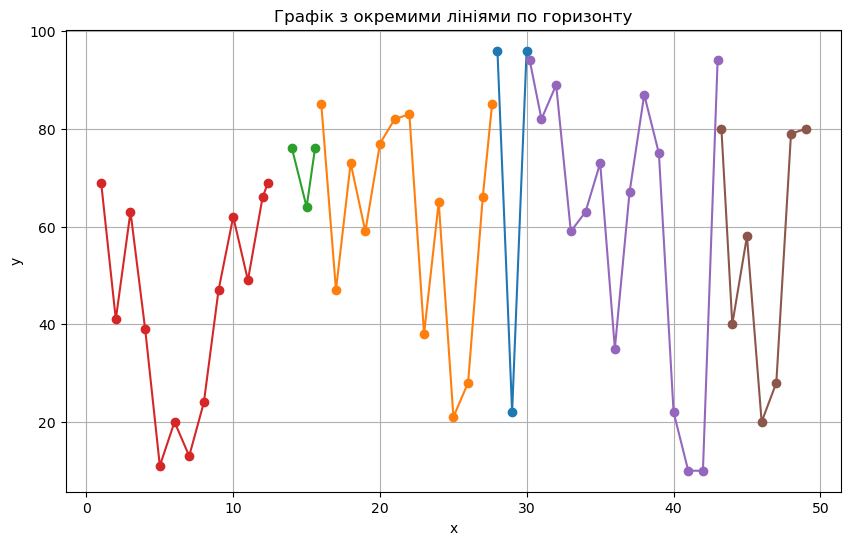

In [55]:
# Викреслюємо графік
plt.figure(figsize=(10, 6))
for line_number, line_data in enumerate(coordinat_transform3):
    x_values = [point[0] for point in line_data]
    y_values = [point[1] for point in line_data]
    plt.plot(x_values, y_values, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Графік з окремими лініями по горизонту')
plt.show()

In [56]:
# Створюємо списки координат і площі
result = []
for coordinat in coordinat_transform3:
    result.append([coordinat, ConvexHull(coordinat).volume])

In [57]:
# Шукаємо криву з максимальною площею
max_value = max(result, key=lambda x: x[1])
max_arrea = max_value[1]
max_coordinat = max_value[0]

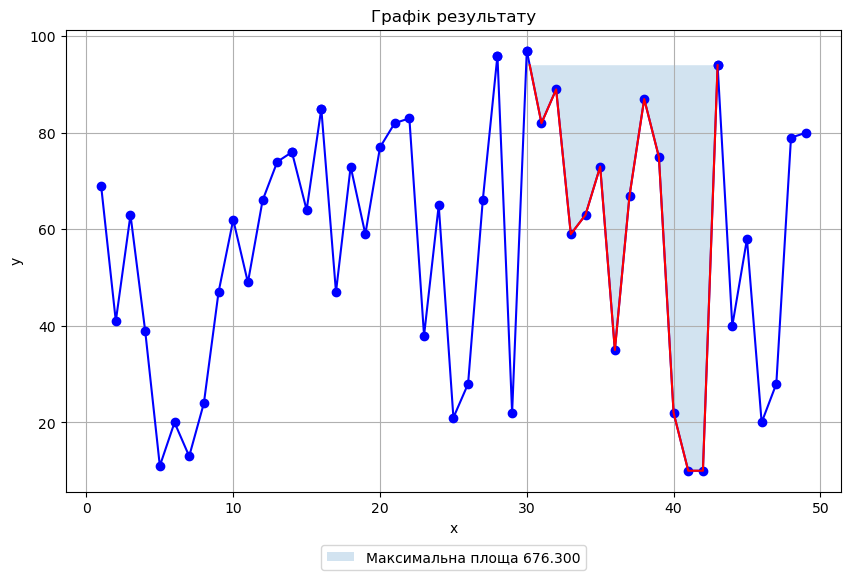

In [58]:
# Викреслюємо графік
plt.figure(figsize=(10, 6))
for line_number, line_data in enumerate(general_curve):
    x_values = [point[0] for point in line_data]
    y_values = [point[1] for point in line_data]
    plt.plot(x_values, y_values, marker='o', color='b')
x_max_values = [point[0] for point in max_coordinat]
y_max_values = [point[1] for point in max_coordinat]
plt.plot(x_max_values, y_max_values, color='r')
plt.fill(x_max_values, y_max_values, alpha=0.2, label='Максимальна площа {:.3f}'.format(max_arrea))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.grid(True)
plt.title('Графік результату')
plt.show()